<a href="https://colab.research.google.com/github/mangnez/SrutiSusarla-EDA-INCOME/blob/main/SrutiSusarla_INCOME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv("/content/income.csv")
df

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,10+ years,Not Married,Three,Two,Family,House,White,English
8989,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Four,NaN,Family,House,White,English
8990,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,10+ years,Not Married,Three,Two,Family,House,White,English
8991,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Yes,Three,One,Rent,Apartment,White,English


In [65]:
print(df.head(3))
print(df.tail(3))

     INCOME SEX MARITAL.STATUS    AGE                EDUCATION  \
0  [75.000-   F        Married  45-54  1 to 3 years of college   
1  [75.000-   M        Married  45-54         College graduate   
2  [75.000-   F        Married  25-34         College graduate   

                OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE UNDER18  \
0                Homemaker  10+ years           No          Three     NaN   
1                Homemaker  10+ years           No           Five     Two   
2  Professional/Managerial  10+ years          Yes          Three     One   

  HOUSEHOLDER  HOME.TYPE ETHNIC.CLASS LANGUAGE  
0         Own      House        White      NaN  
1         Own      House        White  English  
2        Rent  Apartment        White  English  
               INCOME SEX MARITAL.STATUS    AGE                EDUCATION  \
8990         -10.000)   F         Single  14-17           Grades 9 to 11   
8991  [20.000-25.000)   M        Married  55-64  1 to 3 years of college   
89

In [67]:
print(df.dtypes)

INCOME            object
SEX               object
MARITAL.STATUS    object
AGE               object
EDUCATION         object
OCCUPATION        object
AREA              object
DUAL.INCOMES      object
HOUSEHOLD.SIZE    object
UNDER18           object
HOUSEHOLDER       object
HOME.TYPE         object
ETHNIC.CLASS      object
LANGUAGE          object
dtype: object


In [62]:
print(df.describe(include='all'))  # include='all' gives statistics for all types of data

# Check for missing values
print(pd.isna(df).any())

          INCOME   SEX MARITAL.STATUS    AGE                EDUCATION  \
count       8993  8993           8833   8993                     8907   
unique         9     2              5      7                        6   
top     -10.000)     F         Single  25-34  1 to 3 years of college   
freq        1745  4918           3654   2249                     3066   

                     OCCUPATION       AREA DUAL.INCOMES HOUSEHOLD.SIZE  \
count                      8857       8080         8993           8618   
unique                        9          5            3              9   
top     Professional/Managerial  10+ years  Not Married            Two   
freq                       2820       5182         5438           2664   

       UNDER18 HOUSEHOLDER HOME.TYPE ETHNIC.CLASS LANGUAGE  
count     3269        8753      8636         8925     8634  
unique       9           3         5            8        3  
top        One        Rent     House        White  English  
freq      1506     

In [42]:
import pandas as pd

# Display the value counts of the INCOME column to understand the distribution
print(df['INCOME'].value_counts())

# Convert INCOME to numeric, coercing invalid strings (like '?') into NaN
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')

# Calculate the mean of the INCOME column, excluding NaN values
income_mean = df['INCOME'].mean()

# Replace NaN values (including where '?' was originally) with the mean income
df['INCOME'].fillna(income_mean, inplace=True)

# Display the first 10 rows of the cleaned INCOME column
print(df['INCOME'].head(10))


INCOME
-10.000)           1745
[50.000-75.000)    1308
[30.000-40.000)    1110
[40.000-50.000)     969
[75.000-            884
[20.000-25.000)     813
[10.000-15.000)     775
[25.000-30.000)     722
[15.000-20.000)     667
Name: count, dtype: int64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: INCOME, dtype: float64


##Univariate Analysis

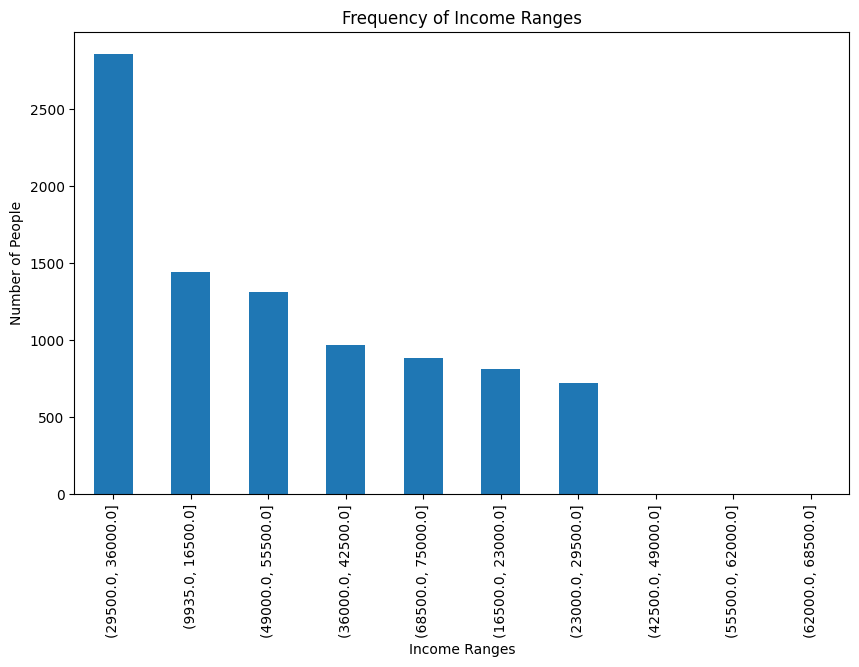

In [69]:
income_bins = pd.cut(df['INCOME'], bins=10)  # Divide the income column into 10 equal-sized bins

# Plot the frequency of income ranges
income_bins.value_counts().nlargest(10).plot(kind='bar', figsize=(10,6))

# Add titles and labels
plt.title("Frequency of Income Ranges")
plt.ylabel('Number of People')
plt.xlabel('Income Ranges')
plt.show()

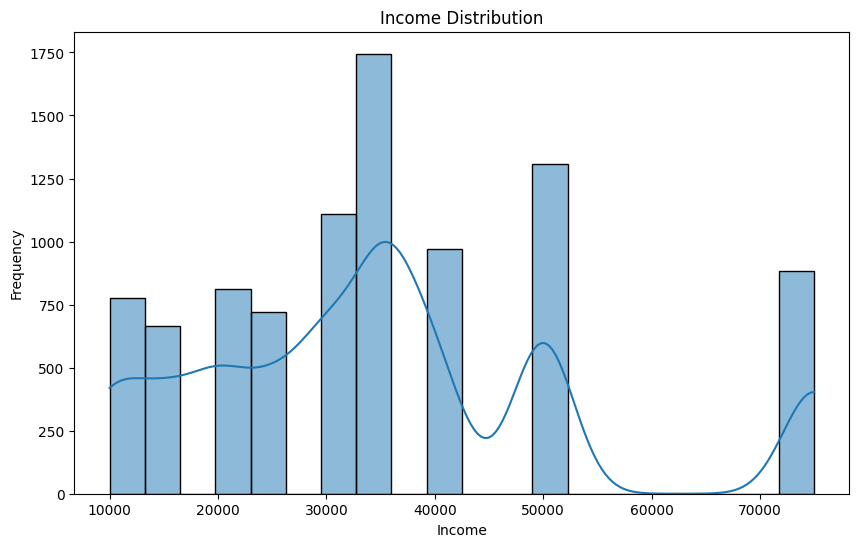

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(10, 6))
sns.histplot(df['INCOME'], kde=True, bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Check for non-numeric values in the 'INCOME' column
print(df['INCOME'].apply(type).value_counts())

# If there are non-numeric values, investigate further and clean the data
# For example, you might need to identify and handle specific string values

# Convert 'INCOME' back to numeric if necessary
df['INCOME'] = pd.to_numeric(df['INCOME'], errors='coerce')

# Calculate mean, median, and mode
mean_income = df["INCOME"].mean()
median_income = df["INCOME"].median()
mode_income = df["INCOME"].mode()[0]

print("Mean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)

INCOME
<class 'str'>    8993
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


KeyError: 0

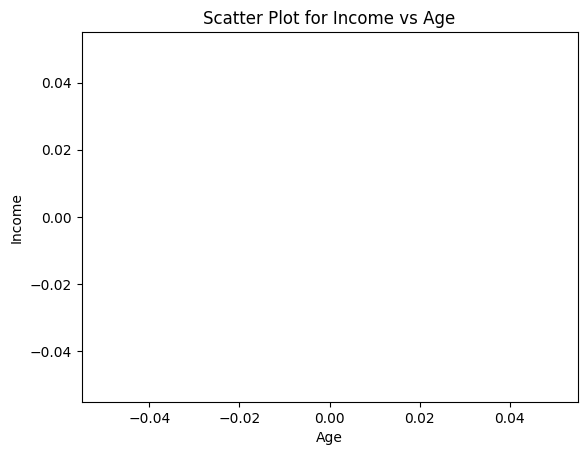

In [71]:
plt.scatter(df["AGE"], df["INCOME"])
plt.title("Scatter Plot for Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

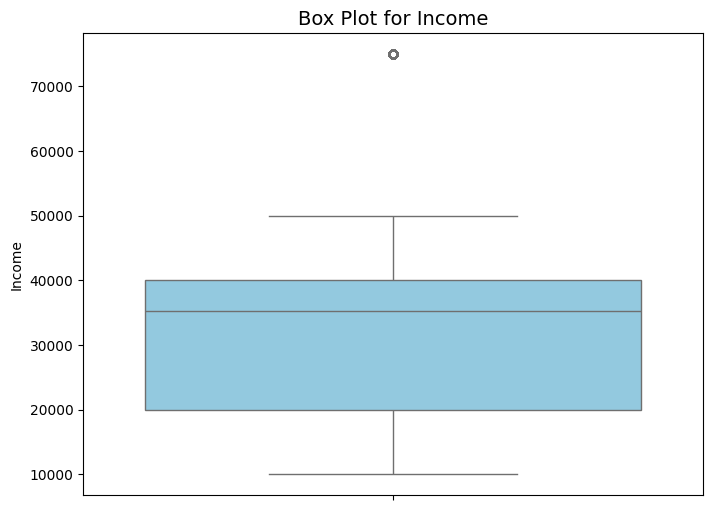

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['INCOME'], color='skyblue')
plt.title('Box Plot for Income', fontsize=14)
plt.ylabel('Income')
plt.show()

In [4]:
import numpy as np

# Define a helper function to convert age ranges to the midpoint
def convert_age_to_numeric(age):
    if '-' in age:
        age_range = age.split('-')
        # Calculate the midpoint of the range
        return (int(age_range[0]) + int(age_range[1])) // 2
    elif age.isnumeric():  # In case of single numeric values, convert directly
        return int(age)
    else:
        return np.nan  # Handle unexpected formats by returning NaN

# Apply the function to the 'AGE' column
df['AGE'] = df['AGE'].apply(convert_age_to_numeric)

# Calculate the mean of the valid numeric values for 'AGE'
age_mean = df['AGE'].mean()

# Replace any remaining NaN values with the mean age (if any)
df['AGE'].fillna(age_mean, inplace=True)

# Now the 'AGE' column should contain numeric values suitable for analysis
# Display the first few rows to verify
print(df['AGE'].head(10))

# Convert the 'AGE' column to integers for simplicity, if needed
df['AGE'] = df['AGE'].astype(int)


0    49.000000
1    49.000000
2    29.000000
3    15.000000
4    15.000000
5    59.000000
6    21.000000
7    29.000000
8    59.000000
9    31.901221
Name: AGE, dtype: float64


In [25]:
df.head(5)

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [7]:
print(df['AGE'].isnull().sum())

0


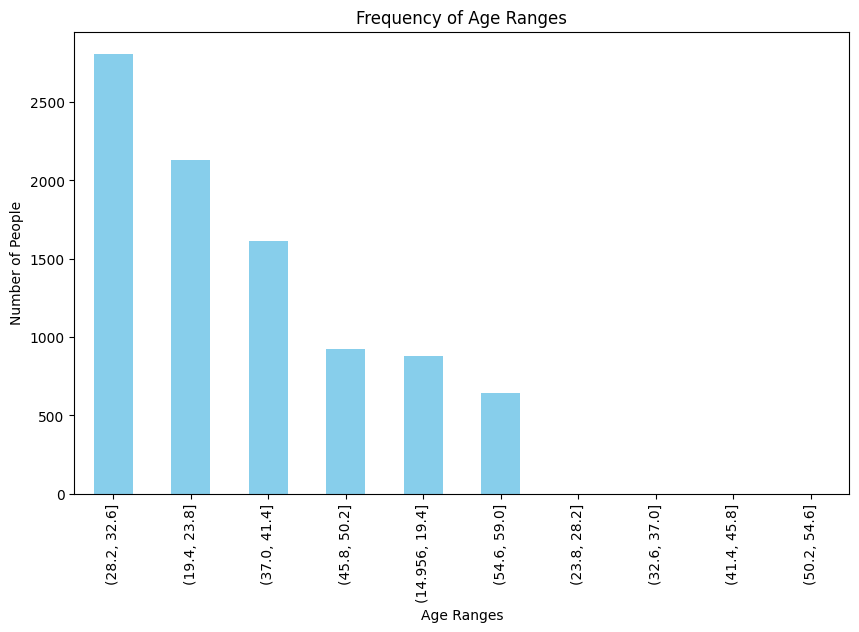

In [11]:
age_bins = pd.cut(df['AGE'], bins=10)
age_bins.value_counts().nlargest(10).plot(kind='bar', figsize=(10,6), color='skyblue')

plt.title("Frequency of Age Ranges")
plt.ylabel('Number of People')
plt.xlabel('Age Ranges')
plt.show()

In [12]:
mean_age = df["AGE"].mean()
median_age = df["AGE"].median()
mode_age = df["AGE"].mode()[0]

print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)

Mean Age: 31.84510174580229
Median Age: 29.0
Mode Age: 29


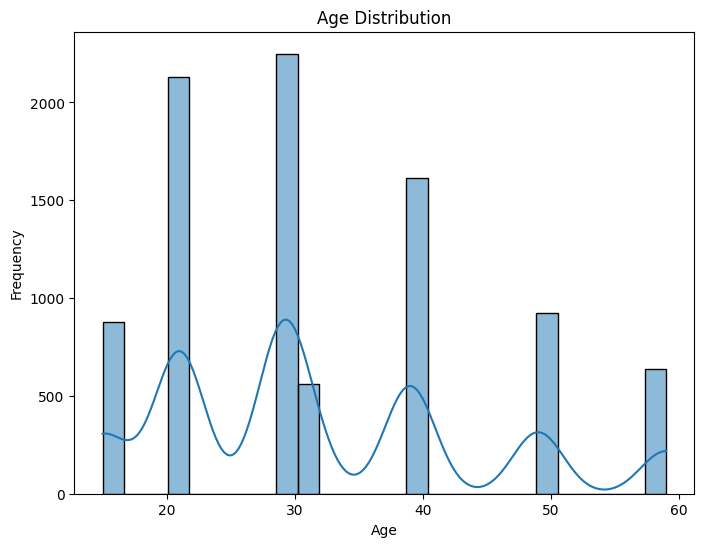

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

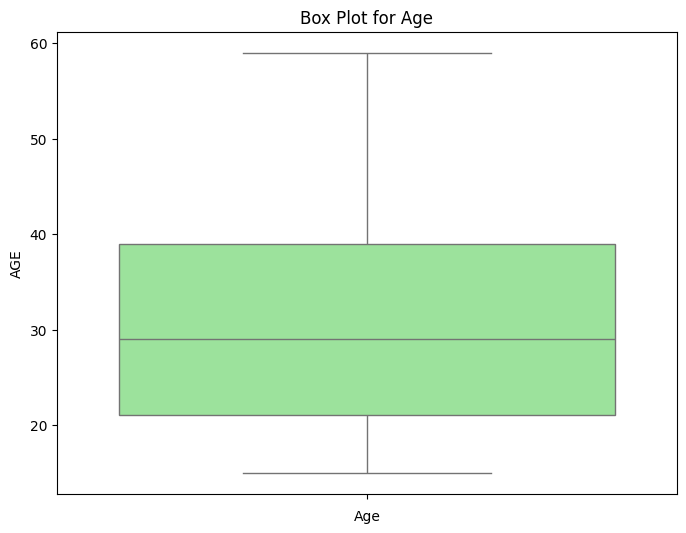

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(df['AGE'], color='lightgreen')
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

In [16]:
unique_values = df['HOUSEHOLD.SIZE'].unique()
print("Unique values in HOUSEHOLD.SIZE:", unique_values)

Unique values in HOUSEHOLD.SIZE: ['Three' 'Five' 'Four' 'Two' 'One' 'Six' nan 'Seven' 'Eight'
 'Nine or more']


In [68]:
data = {'HOUSEHOLD.SIZE': ['Three', 'Five', 'Four', 'Two', 'One', 'Six', None, 'Seven', 'Eight', 'Nine or more']}
dfh = pd.DataFrame(data)
household_size_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Six': 6,
    'Seven': 7,
    'Eight': 8,
    'Nine or more': 9,
}
# Apply the mapping to convert the string values to numeric values
dfh['HOUSEHOLD.SIZE'] = dfh['HOUSEHOLD.SIZE'].map(household_size_mapping)

print("After mapping:\n", dfh['HOUSEHOLD.SIZE'])

After mapping:
 0    3.0
1    5.0
2    4.0
3    2.0
4    1.0
5    6.0
6    NaN
7    7.0
8    8.0
9    9.0
Name: HOUSEHOLD.SIZE, dtype: float64


In [ ]:
#Null value analysis
null_values = df['HOUSEHOLD.SIZE'].isnull().sum()
print(f"Number of null values in HOUSEHOLD.SIZE: {null_values}")

In [ ]:
# Fill null values with the mean or other appropriate value if necessary
df['HOUSEHOLD.SIZE'].fillna(df['HOUSEHOLD.SIZE'].mean(), inplace=True)

In [ ]:
# Plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['HOUSEHOLD.SIZE'], kde=False, bins=6, color='skyblue')
plt.title('Distribution of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['HOUSEHOLD.SIZE'], color='lightgreen')
plt.title('Box Plot of Household Size')
plt.xlabel('Household Size')
plt.show()

##Bivariate Analysis

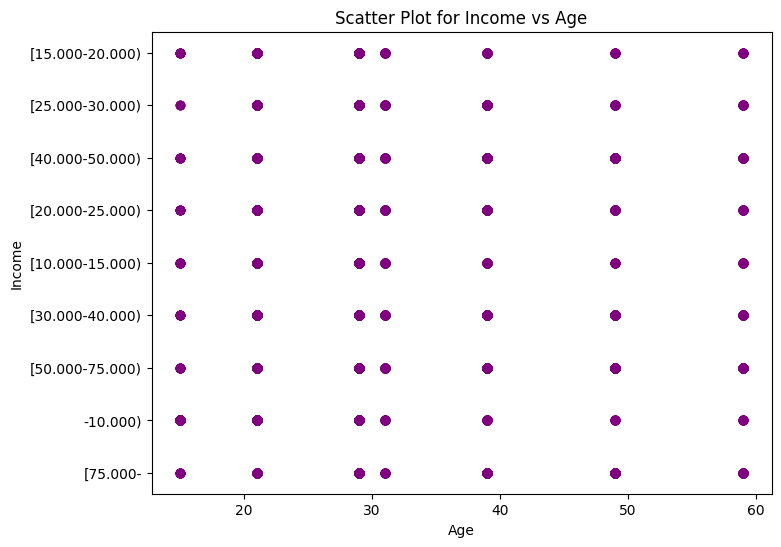

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['AGE'], df['INCOME'], color='purple')
plt.title("Scatter Plot for Income vs Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

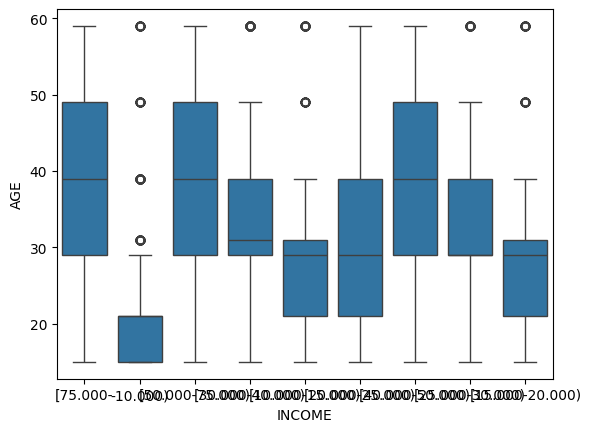

In [15]:
sns.boxplot(x="INCOME",y="AGE",data=df)
plt.show()

##Multivariate Analysis

In [ ]:
sns.pairplot(df,vars = ['AGE', 'INCOME','HOUSEHOLD.SIZE'], kind="reg")
plt.show()